# 실시간 이미지 분류 앱

## 중요 개념

### 1 UI
- `layout_height`를 0으로 주고 
  - `layout_weight`에 비율을 줘서 화면 레이아웃을 조정할 수 있다!

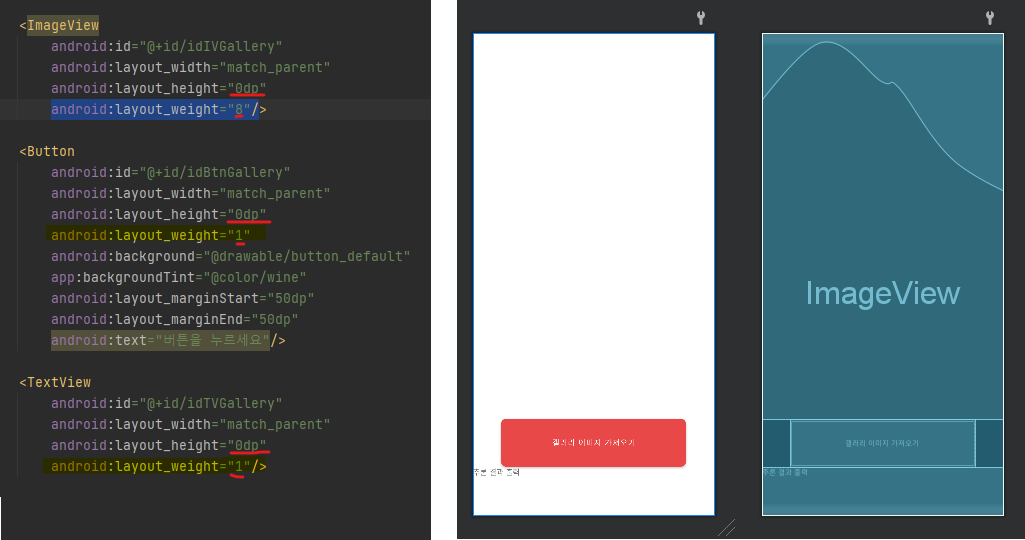

In [ ]:
path = "/content/here/MyDrive/Android/ImageClassifier/layout by ratio.png"
show_img(path)

#### 에뮬레이터 이미지 삽입
- `[View] - [Tool Windows] - [Device File Explorer]`
- `sdcard` 디렉토리의 `Pictures` 디렉토리에서 이미지 파일을 복사

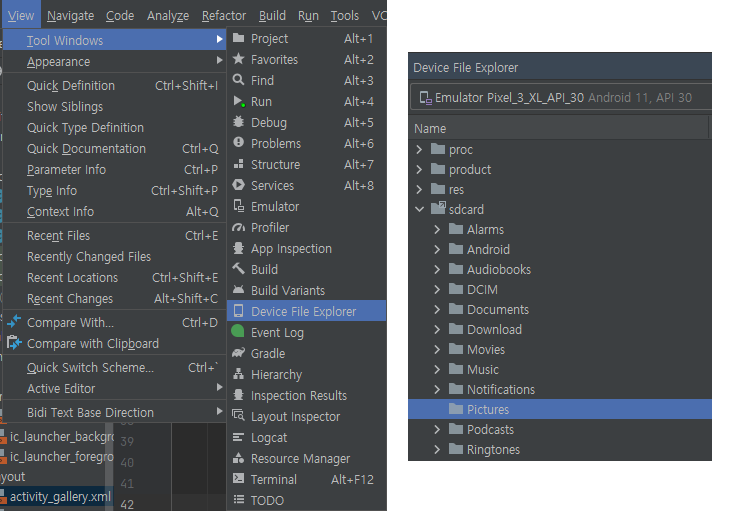

In [ ]:
path = "/content/here/MyDrive/Android/ImageClassifier/if you dont have images.png"
show_img(path)

`Camera2 API`
- 카메라를 사용할 앱은 먼저 액티비티에서 `CameraManager`를 획득하고 `CameraManager`에서 Cameracharacteristics를 얻어 카메라 관련 정보를 알 수 있음
- `CameraManager` 의 `openCamara( )` 메소드로 카메라와 연결하고 연결된 카메라의
CameraDevice 객체를 얻을 수 있음
- `CameraDevice`는 `CaptureReques`t를 생성하여 캡처와 관련된 요청 사항을 설정하고 `createCaptureSession( )` 메소드로 이미지를 받아올 CameraCaptureSession을 생성한 후 세션이 열리면 캡처를 시작하도록 세션에 요청하고 요청 결과를 반환함

- 안드로이드나 iOS에 서버 없이 또는 네트워크 연동이 되지 않아도 머선러닝을 하고자 하는 경우에는 머선러닝 모델을 디바이스에 맞게 변환해주어야 함.
  - 서버없이 돌리면 속도가 빠름.
  - 안드로이드의 경우 `tensorflow-lite`나 `pytorch-lite`모델로 변환해서 사용해야 함.

#### Deprecation

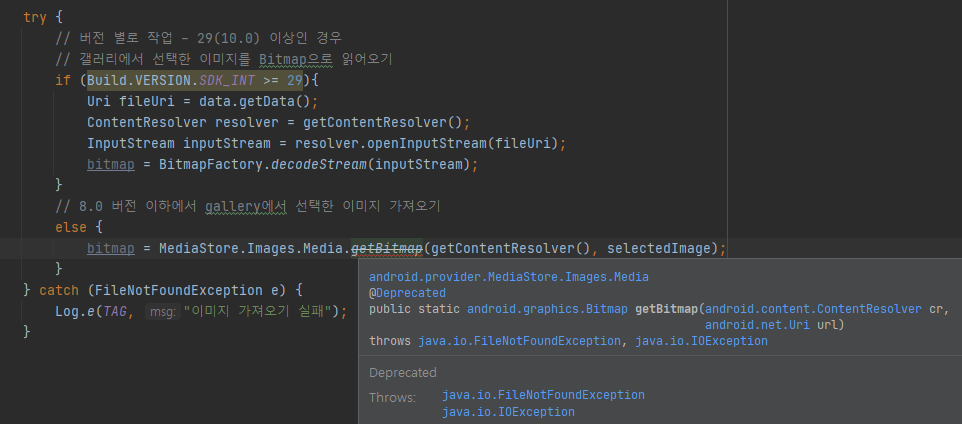

In [ ]:
path = "/content/here/MyDrive/Android/ImageClassifier/deprecation.png"
show_img(path)

### 2 `Java`

#### Open Gallery

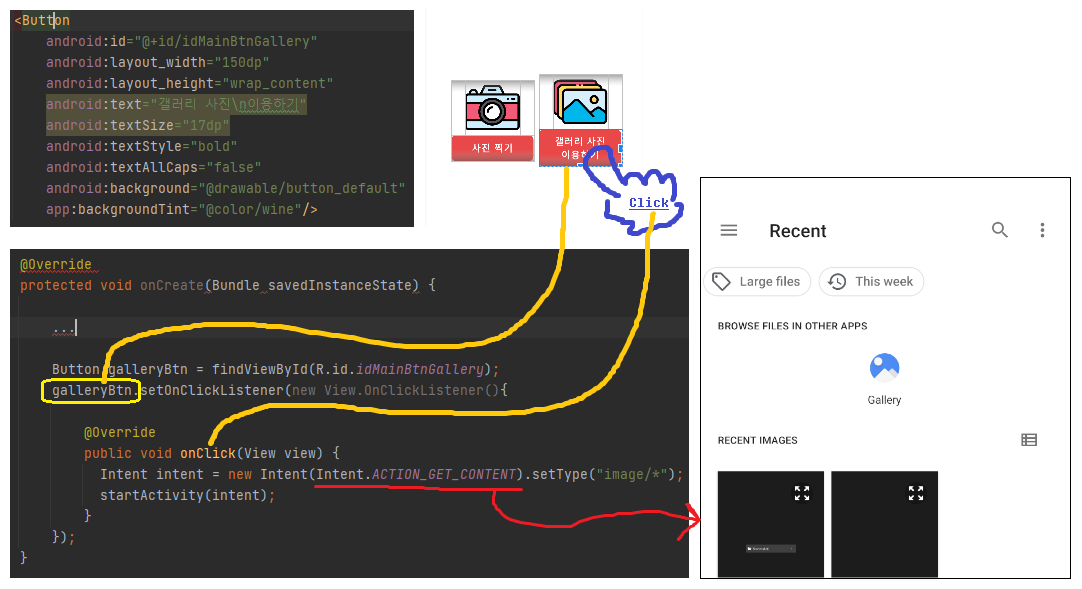

In [2]:
path = "/content/here/MyDrive/Android/ImageClassifier/open gallery on main.png"
show_img(path)

## 업데이트
- 앱 개발시에는 업데이트도 고려해준다. 
  - 서버가 모델을 보유: 서버에서만 업데이트하면 업데이트가 모델에 적용됨.
  - 클라이언트에 모델을 가지는 경우 클라이언트가 앱을 업데이트 해야만 내용이 적용됨.

## 모델 생성
- keras에 있는 `MobileNetV2`라는 사전훈련된 모델을 이용
   - 학습할 필요가 없고 모델만 생성해 변환해서 사용
   

In [ ]:
import tensorflow as tf

In [ ]:
# 사전훈련된 모델 가져오기
mobilenet_imagenet_model = tf.keras.applications.MobileNetV2(weights="imagenet")

14548992/14536120 [==============================] - 0s 0us/step


In [ ]:
# TFLite 모델로 변환
converter = tf.lite.TFLiteConverter.from_keras_model(mobilenet_imagenet_model)
ftlite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmp1n2_qjyd/assets


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
from google.colab import drive
drive.mount('here')

Mounted at here


In [ ]:
# 파일로 저장
with open('/content/here/MyDrive/Android/Model/mobilenet_imagenet_model.tflite', 'wb') as f:
    f.write(ftlite_model)

# 오류 공책


## 1 a variable has a private access

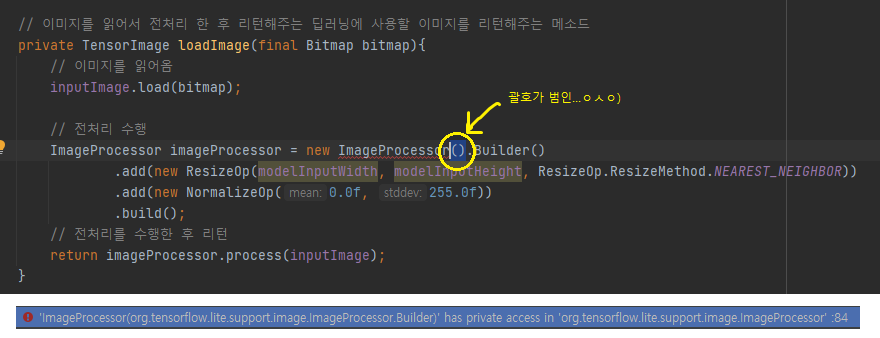

In [ ]:
path = "/content/here/MyDrive/Android/ImageClassifier/private access.png"
show_img(path)

## 2 자료형 오류(`DataType Error`)

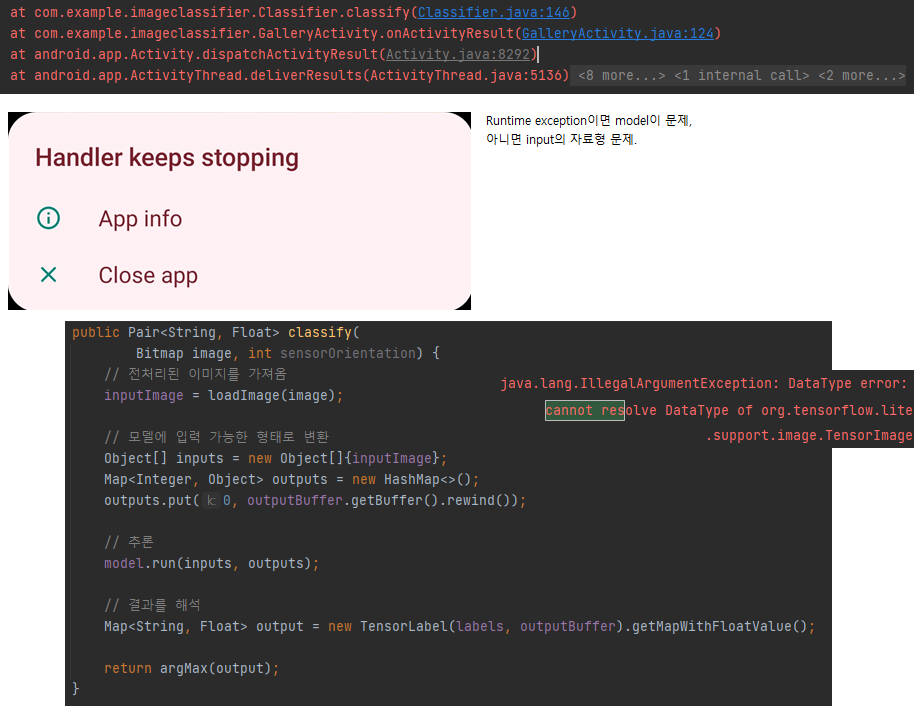

In [ ]:
path = "/content/here/MyDrive/Android/ImageClassifier/datatype error.png"
show_img(path)

### 해결책 - `.getBuffer()`
getBuffer로 byteBuffer를 받아와서 자료형을 맞춰줌.

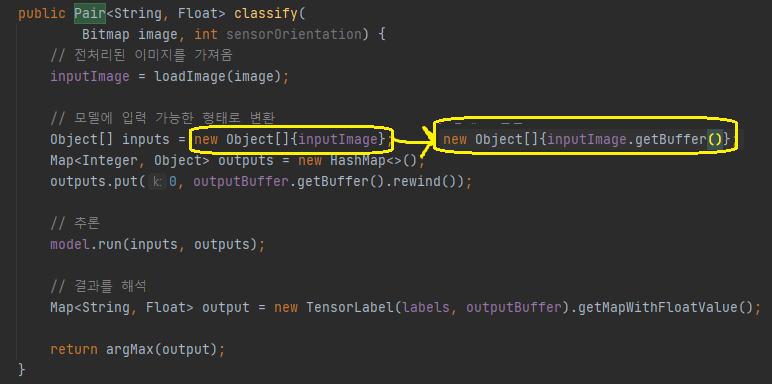

In [ ]:
solution = "/content/here/MyDrive/Android/ImageClassifier/datatype error - solution - getBuffer.png"
show_img(solution)